In [2]:
from torch.utils.data import Dataset
from preprocessing import for_kaggle
from evaluation import *

import json
import pandas as pd
import torch

In [5]:
# year & venue
year_venue = torch.load("outputs/year_venue.pt")
year_venue = year_venue.detach().numpy()

# abstract & title
abstract_title = torch.load("outputs/abstract_title_doc2vec.pt")
abstract_title = abstract_title.detach().numpy()

# coauthor
author = torch.load("outputs/author.pt")
author = author.detach().numpy()


## Weighted

In [45]:
COAUTHOR_WEIGHT = 0.5789473684
YEAR_VENUE_WEIGHT = 0.3157894737
SENTENCE_WEIGHT = 0.1052631579
THRESHOLD = 0.3

In [46]:
kaggle_predict = predict(
            author=author,
            year_venue=year_venue,
            abstracts_title=abstract_title,
            YEAR_VENUE_WEIGHT=YEAR_VENUE_WEIGHT,
            COAUTHOR_WEIGHT=COAUTHOR_WEIGHT,
            SENTENCE_WEIGHT=SENTENCE_WEIGHT,
            THRESHOLD=THRESHOLD
        )

In [47]:
kaggle = pd.DataFrame(columns=["ID", "Predict"])
kaggle['Predict'] = to_list(kaggle_predict)
kaggle['ID'] = kaggle.index
kaggle = kaggle.set_index('ID')
kaggle.to_csv("../../kaggle/predict_MESSI.csv")

## Prediction Describe

In [49]:
count = 0
for i in kaggle['Predict']:
    if i == '-1':
        count += 1

print('proportion of no authors  : ', count/800)
print('number of having prolific authors  : ', 800-count)

proportion of no authors  :  0.42375
number of having prolific authors  :  461


In [50]:
kaggle.head()

,Predict
ID,
0,92
1,2
2,31
3,23
4,-1


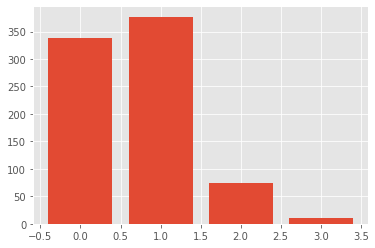

In [51]:
from matplotlib import pyplot as plt

counts = {}
for i in kaggle['Predict']:
    if i == '-1':
        if 0 in counts:
            counts[0] += 1
        else:
            counts[0] = 1
        continue

    num_author = len(i.split())
    if num_author in counts:
        counts[num_author] += 1
    else:
        counts[num_author] = 1

plt.bar(counts.keys(), counts.values())
plt.show()

In [73]:
kaggle

,Predict
ID,
0,1 10 92
1,1 2
2,31
3,6 23
4,-1
...,...
795,1 54
796,97
797,13 71


# Kaggle Predictions

- YEAR_VENUE_WEIGHT = 1/3
- COAUTHOR_WEIGHT = 1/3
- SENTENCE_WEIGHT = 1/3
    - f1 = 0.47230

# Kaggle Predictions - 2

- YEAR_VENUE_WEIGHT = 0.08884680485159918.
- COAUTHOR_WEIGHT = 0.5925861815691253
- SENTENCE_WEIGHT = 0.3185670135792754
    - f1 = 0.52080

In [21]:
print(YEAR_VENUE_WEIGHT)
print(COAUTHOR_WEIGHT)
print(SENTENCE_WEIGHT)

0.09042157448160128
0.5981903768759776
0.31138804864242114


# Kaggle Predictions - Weighted （best）

- YEAR_VENUE_WEIGHT = 0.09042157448160128
- COAUTHOR_WEIGHT = 0.5981903768759776
- SENTENCE_WEIGHT = 0.31138804864242114
- THRESHOLD = 0.2
    - f1 = 0.56880

# Kaggle Predictions - Weighted

- YEAR_VENUE_WEIGHT = 0.08346672643333612
- COAUTHOR_WEIGHT = 0.586237115452411
- SENTENCE_WEIGHT = 0.3302961581142529
- THRESHOLD = 0.2
    - f1 = 0.54747

# Kaggle Predictions - 3

- YEAR_VENUE_WEIGHT = 0.09421771031395267.
- COAUTHOR_WEIGHT = 0.43393907367832263
- SENTENCE_WEIGHT = 0.4718432160077247
- THRESHOLD = 0.3
    - f1 = 0.53130